In [20]:
import numpy as np
import pandas as pd
import itertools
import array
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [21]:
#Read the data
df=pd.read_csv('E:\\Major Project\\Dataset\\news.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


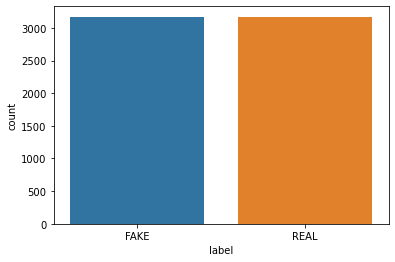

In [22]:
df.shape
import seaborn as sns
sns.countplot(df['label']) 
plt.show()

In [23]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [24]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.3, random_state=7)

In [25]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [26]:
tfidf_train.get_shape()

(4434, 57794)

In [27]:
tfidf_test.get_shape()

(1901, 57794)

In [28]:
acc=[]

In [29]:
#Initialize a PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy

y_pred=pac.predict(tfidf_test)
print(y_pred)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
acc.append(round(score*100,2))

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']
Accuracy: 92.37%


In [30]:
mul=MultinomialNB()
mul.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy

y_pred1=mul.predict(tfidf_test)
print(y_pred1)
score=accuracy_score(y_test,y_pred1)
print(f'Accuracy: {round(score*100,2)}%')
acc.append(round(score*100,2))

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']
Accuracy: 82.11%


In [31]:
dec=DecisionTreeClassifier()
dec.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy

y_pred2=dec.predict(tfidf_test)
print(y_pred2)
score=accuracy_score(y_test,y_pred2)
print(f'Accuracy: {round(score*100,2)}%')
acc.append(round(score*100,2))

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']
Accuracy: 80.75%


In [32]:
ran=RandomForestClassifier()
ran.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy

y_pred3=ran.predict(tfidf_test)
print(y_pred3)
score=accuracy_score(y_test,y_pred3)
print(f'Accuracy: {round(score*100,2)}%')
acc.append(round(score*100,2))

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']
Accuracy: 90.01%


In [33]:
svc=SVC()
svc.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy

y_pred4=svc.predict(tfidf_test)
print(y_pred4)
score=accuracy_score(y_test,y_pred4)
print(f'Accuracy: {round(score*100,2)}%')
acc.append(round(score*100,2))

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']
Accuracy: 92.48%


In [34]:
#Build confusion matrix

confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[900,  74],
       [ 71, 856]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       974
        REAL       0.92      0.92      0.92       927

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



In [36]:
len=1901
i=0
y_final=[]
while i < len:
    a=[]
    a.append(y_pred[i])
    a.append(y_pred1[i])
    a.append(y_pred2[i])
    a.append(y_pred3[i])
    a.append(y_pred4[i])
    Rcount=a.count('REAL')
    Fcount=a.count('FAKE')
    if Rcount>Fcount:
        y_final.append('REAL')
    else:
        y_final.append('FAKE')
    i=i+1
print(y_final)

['REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE',

In [37]:
score=accuracy_score(y_test,y_final)
print(score)

0.9237243556023146


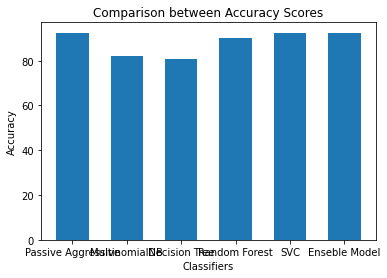

In [50]:
a=["Passive Aggressive","MultinomialNB","Decision Tree","Random Forest","SVC","Enseble Model"]
b=[92.37,82.11,80.75,90.01,92.48,92.37]
plt.bar(a,b,0.6)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison between Accuracy Scores")
plt.show()